In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from keras.models import Model, load_model
from keras.applications.xception import Xception
from tensorflow.keras.utils import pad_sequences
from pickle import load
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing.text import Tokenizer





In [2]:
with open("tokenizer.p", "rb") as f:
    tokenizer = load(f)
max_length = 39

caption_model = load_model('model.h5') 

In [3]:

def extract_features(filename, model):
        try:
            image = Image.open(filename)
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
         if index == integer:
             return word
    return None
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text


1/1 [==============================] - 1s 1s/step



 soccer ball soccer ball soccer ball boy young                               soccer


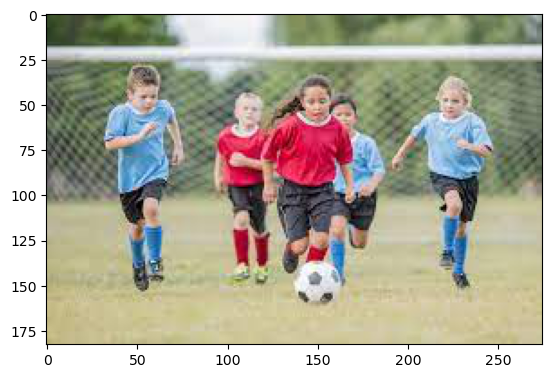

In [8]:
img_path = 'ImagesToTest/3.jpg'


DenseNet201_model = DenseNet201(include_top=False, pooling="avg")

photo = extract_features(img_path, DenseNet201_model)
img = Image.open(img_path)
description = generate_desc(caption_model, tokenizer, photo, max_length)

description = description.replace('start','')
description = description.replace('endseq','')
description = description.replace('is','')



print("\n\n")
print(description)
plt.imshow(img)